 ## 상품명 : 미래에셋대우 공모 ELS 26011회 조기상환형 조건충족시 연 7.5%(세전) / 최대손실률 -100%  
## 상품정보 : https://www.miraeassetdaewoo.com/ 접속 후 상품정보>ELS 검색에서 날짜 2018/06/08에 26011
## 기초지수 : S&P500 - HSECI - EUROSTOXX50

## Local Vol데이터는 다음채널의 local volatility 참고 : https://github.com/ciiadaesun/Derivative_Pricing

### BS PDE 3 Asset

$$
\begin{array}{c}
\\
\ u_{\tau} = (r-d_{x})xu_{x} + (r-d_{y})yu_{y} + (r-d_{z})zu_{z} \\
\ + \frac{1}{2}(\sigma_{x}x)^{2}u_{xx} + \frac{1}{2}(\sigma_{y}y)^{2}u_{yy} + \frac{1}{2}(\sigma_{z}z)^{2}u_{zz}\\
\ + \rho_{xy}\sigma_{x}\sigma_{y}xyu_{xy} + \rho_{yz}\sigma_{y}\sigma_{z}yzu_{yz}+ \rho_{xz}\sigma_{z}\sigma_{x}zxu_{xz} - ru \\\
\\
\ u_{\tau}  = (1) + (2) + (3) \\  \\
(1) \ \ = (r-d_{x})xu_{x}+ \frac{1}{2}(\sigma_{x}x)^{2}u_{xx}+ \frac{1}{3}\rho_{xy}\sigma_{x}\sigma_{y}xyu_{xy} 
\  + \frac{1}{3}\rho_{yz}\sigma_{y}\sigma_{z}xyu_{yz}+ \frac{1}{3}\rho_{xz}\sigma_{z}\sigma_{x}xyu_{xz} - \frac{1}{3} ru \\
(2) \ \ = (r-d_{y})xu_{y}+ \frac{1}{2}(\sigma_{y}y)^{2}u_{yy}+ \frac{1}{3}\rho_{xy}\sigma_{x}\sigma_{y}xyu_{xy} 
\  + \frac{1}{3}\rho_{yz}\sigma_{y}\sigma_{z}xyu_{yz}+ \frac{1}{3}\rho_{xz}\sigma_{z}\sigma_{x}xyu_{xz} - \frac{1}{3} ru \\
(3) \ \ = (r-d_{z})xu_{z}+ \frac{1}{2}(\sigma_{z}z)^{2}u_{zz}+ \frac{1}{3}\rho_{xy}\sigma_{x}\sigma_{y}xyu_{xy} 
\  + \frac{1}{3}\rho_{yz}\sigma_{y}\sigma_{z}xyu_{yz}+ \frac{1}{3}\rho_{xz}\sigma_{z}\sigma_{x}xyu_{xz} - \frac{1}{3} ru \\
\end{array}
$$
### Assumption
$$
\begin{array}{c}
\ \Delta t = h \ , \ \Delta X = \Delta Y = \Delta Z , \ [if \  m = 0 : \ maturity, \ elif \  m = M \ : \ current\ price]  
\end{array}
$$
### Difference Equation Transform:

$$
\begin{array}{c}
U_{\tau} \ \ : \ \frac{U_{n_x , n_y , n_z }^{m+1} - U_{n_x , n_y, n_z}}{h} \\
(r-d_x )xu_x \ \ : \ (r-d_x ) (n_x \Delta X) (\frac{U_{n_x +1 , n_y , n_z }^{m+1} - U_{n_x , n_y, n_z}^{m+1}}{\Delta X})  \ : backward \\
\frac{1}{2} (\sigma_x x)^2 u_{xx} \ \ : \frac{(\sigma_x n_x)^2}{2} (U_{n_x +1 , n_y , n_z}^{m+1} - 2 U_{n_x , n_y, n_z}^{m+1} + U_{n_x -1, n_y , n_z }^{m+1})\ : backward \\
\rho_{xy} \sigma_x \sigma_y xy u_{xy} \ \ : \frac{1}{4}(U_{n_x +1 , n_y +1 , n_z}^{m} + U_{n_x -1 , n_y -1, n_z}^{m} - U_{n_x +1, n_y -1, n_z}^{m} - U_{n_x -1, n_y +1 , n_z}^{m}) \ : forward
\end{array}
$$

### Operator Splitting :

$$
\begin{array}{c}
\frac{U_{n_x , n_y , n_z }^{m+1} - U_{n_x , n_y, n_z}}{h} = \frac{U_{n_x , n_y , n_z }^{m+\frac{1}{3}} - U_{n_x , n_y, n_z}^{m}}{h} + \frac{U_{n_x , n_y , n_z }^{m+\frac{2}{3}} - U_{n_x , n_y, n_z}^{m+\frac{1}{3}}}{h}  + \frac{U_{n_x , n_y , n_z }^{m+1} - U_{n_x , n_y, n_z}^{m+\frac{2}{3}}}{h} = (1) + (2) + (3)
\end{array}
$$

 #### (1) Implicit for x (From m to m + 1/3)
 

$$
\begin{array}{c}
\frac{U_{n_x , n_y , n_z }^{m+\frac{1}{3}} - U_{n_x , n_y, n_z}^{m}}{h} \\
=(r-d_{x})n_x (U_{n_x +1 , n_y, n_z}^{m+\frac{1}{3}}-U_{n_x , n_y, n_z}^{m+\frac{1}{3}})+ \frac{1}{2}(\sigma_{x}n_x)^{2}(U_{n_x +1, n_y, n_z}^{m+\frac{1}{3}}-2U_{n_x , n_y, n_z}^{m+\frac{1}{3}} + U_{n_x -1, n_y, n_z}^{m+\frac{1}{3}}) \\ + \frac{1}{3}\rho_{xy}\sigma_{x}\sigma_{y} \frac{1}{4}(U_{n_x +1, n_y +1, n_z}^{m} + U_{n_x -1, n_y -1, n_z }^{m} - U_{n_x +1, n_y -1, n_z }^{m} - U_{n_x -1 , n_y +1, n_z }^{m}) \\ 
+ \frac{1}{3}\rho_{yz}\sigma_{y}\sigma_{z} \frac{1}{4}(U_{n_x +1, n_y, n_z +1}^{m} + U_{n_x -1, n_y , n_z -1 }^{m} - U_{n_x +1, n_y , n_z -1}^{m} - U_{n_x -1 , n_y , n_z +1}^{m}) \\ 
+ \frac{1}{3}\rho_{xz}\sigma_{x}\sigma_{z} \frac{1}{4}(U_{n_x, n_y +1, n_z +1}^{m} + U_{n_x , n_y -1, n_z -1}^{m} - U_{n_x , n_y +1, n_z -1}^{m} - U_{n_x , n_y -1, n_z +1}^{m})
\end{array}
$$

 ####   Parameters (From m to m + 1/3)
$$
\begin{array}{c}
B_{n_x} U_{n_x -1, n_y , n_z }^{m+\frac{1}{3}} + A_{n_x} U_{n_x, n_y , n_z }^{m+\frac{1}{3}} + C_{n_x} U_{n_x +1, n_y , n_z }^{m+\frac{1}{3}} = d_{n_x , n_y , n_z}^{m}
\\ ----------------------------- \\
A_{n_x} = 1 + h(\frac{1}{3} r + (r-D_x) n_x + (\sigma_x n_x)^2) \\
B_{n_x} = -0.5 (\sigma_x n_x )^2 h \\
C_{n_x} = -0.5(\sigma_x n_x )^2 h - (r-D_x ) n_x \bullet h
\\
\\
d_{n_x , n_y , n_z}^{m} = U_{n_x , n_y , n_z}^{m} \\ \ + \frac{1}{3}\rho_{xy}\sigma_{x}\sigma_{y} \bullet h \frac{1}{4}(U_{n_x +1, n_y +1, n_z}^{m} + U_{n_x -1, n_y -1, n_z }^{m} - U_{n_x +1, n_y -1, n_z }^{m} - U_{n_x -1 , n_y +1, n_z }^{m}) \\ 
+ \frac{1}{3}\rho_{yz}\sigma_{y}\sigma_{z} \bullet h \frac{1}{4}(U_{n_x +1, n_y, n_z +1}^{m} + U_{n_x -1, n_y , n_z -1 }^{m} - U_{n_x +1, n_y , n_z -1}^{m} - U_{n_x -1 , n_y , n_z +1}^{m}) \\ 
+ \frac{1}{3}\rho_{xz}\sigma_{x}\sigma_{z} \bullet h \frac{1}{4}(U_{n_x, n_y +1, n_z +1}^{m} + U_{n_x , n_y -1, n_z -1}^{m} - U_{n_x , n_y +1, n_z -1}^{m} - U_{n_x , n_y -1, n_z +1}^{m})
\\
\end{array}
$$
$$
\begin{array}{c}
\\
\begin{bmatrix} b_1 + 2a_1 & c_1-a_1 & 0 & 0& .. & 0& 0 & 0\\ a_2 & b_2 & c_2& 0& ..& 0 & 0& 0 \\ 0 & a_3 & b_3& c_3& ..& 0 & 0& 0\\ 0 & 0 & a_4& b_4& ..& 0& 0& 0\\ .. & .. & ..& ..& ..& 0& 0& 0\\ .. & .. & ..& ..& ..& a_{N-2} & b_{N-2}& c_{N-2}\\ 0 & 0 & 0& 0& 0& 0& a_{N-1}-c_{N-1}& b_{N-1}+2c_{N-1} \end{bmatrix} U_{n_x, n_y, n_z}^{m+\frac{1}{3}} = d_{n_x , n_y, n_z}^{m}
\\
\\
(Inv \ tridiag_{n_x})^{-1} \bullet d_{n_x , n_y, n_z}^{m} = u_{n_x ,n_y, n_z}^{m+\frac{1}{3}}
\\
\end{array}
$$

##### Boundary Condition 
$$
\begin{array}{c}
U_{N} \ = \  2U_{N-1} - U_{N-2} \\ 
U_{N} \ >= \ max(U_{N-1}\ , \ U_{N-2}) \\ \\
\end{array}
$$

 #### (2) Implicit for y and Parameters (From m +1/3 to m + 2/3)
$$
\begin{array}{c}
B_{n_y} U_{n_x , n_y -1 , n_z }^{m+\frac{2}{3}} + A_{n_y} U_{n_x, n_y , n_z }^{m+\frac{2}{3}} + C_{n_x} U_{n_x , n_y +1, n_z }^{m+\frac{2}{3}} = d_{n_x , n_y , n_z}^{m + \frac{1}{3}}
\\ ----------------------------- \\
A_{n_y} = 1 + h(\frac{1}{3} r + (r-D_y) n_y + (\sigma_y n_y)^2) \\
B_{n_y} = -0.5 (\sigma_y n_y )^2 h \\
C_{n_y} = -0.5(\sigma_y n_y )^2 h - (r-D_y ) n_y \bullet h
\\
(Inv \ tridiag_{n_y})^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{1}{3}} = u_{n_x ,n_y, n_z}^{m+\frac{2}{3}}
\end{array}
$$ 
 
 #### (3) Implicit for z and Parameters (From m +2/3 to m + 1)
$$
\begin{array}{c}
B_{n_z} U_{n_x , n_y , n_z -1}^{m+1} + A_{n_y} U_{n_x, n_y , n_z }^{m+1} + C_{n_x} U_{n_x , n_y , n_z +1}^{m+1} = d_{n_x , n_y , n_z}^{m+\frac{2}{3}}
\\ ----------------------------- \\
A_{n_z} = 1 + h(\frac{1}{3} r + (r-D_z) n_z + (\sigma_z n_z)^2) \\
B_{n_z} = -0.5 (\sigma_z n_z )^2 h \\
C_{n_z} = -0.5(\sigma_z n_z )^2 h - (r-D_z ) n_z \bullet h
\\
(Inv \ tridiag_{n_z})^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{2}{3}} = u_{n_x ,n_y, n_z}^{m+1}
\end{array}
$$  

 #### ELS Pricing sequence :
$$
\begin{array}{c}
for \ m \ in \ range(T/h) \ : \ \ \ \ \ \ \ \ \ \ \ \ \ \
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \\
 U(KI)_{n_x ,n_y, n_z}^{m+\frac{1}{3}}  = Inv \ tridiag( n_x, \tau , KI = True)^{-1} \bullet d_{n_x , n_y, n_z}^{m} \ S.\ T.\ Boundary\ \\
U(KI)_{n_x ,n_y, n_z}^{m+\frac{2}{3}} = Inv \ tridiag( n_y, \tau , KI = True)^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{1}{3}}\ S.\ T.\ Boundary\ \\ 
U(KI)_{n_x ,n_y, n_z}^{m+1} = Inv \ tridiag( n_z, \tau , KI = True)^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{2}{3}}\ S.\ T.\ Boundary\ \\
--------------------------
\\
U(NKI)_{n_x ,n_y, n_z}^{m+\frac{1}{3}} = Inv \ tridiag( n_x, \tau , KI = False)^{-1} \bullet d_{n_x , n_y, n_z}^{m} \ S.\ T.\ Boundary \\
U(NKI)_{n_x ,n_y, n_z}^{m+\frac{2}{3}} = Inv \ tridiag( n_y, \tau , KI = False)^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{1}{3}} \ S.\ T.\ Boundary \\ 
U(NKI)_{n_x ,n_y, n_z}^{m+1} = Inv \ tridiag( n_z, \tau , KI = False)^{-1} \bullet d_{n_x , n_y, n_z}^{m+\frac{2}{3}} \ S.\ T.\ Boundary \\
--------------------------
\\
Overwrite \  the \ NKI \ Matrix \ below \ Barier \ with \ KI \ Matrix \\
Overwrite \ Autocall \ Payoff \  at\  Autocall \ date\\
\end{array}
$$  

In [10]:
import numpy as np
import pandas as pd
from scipy.sparse import diags
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numba import jit
import warnings
import threading
from datetime import datetime as dt
warnings.filterwarnings(action='ignore') 
inv     = np.linalg.inv

In [11]:
cd C:\Users\USER\Quant

C:\Users\USER\Quant


In [12]:
preprocessing_vol = lambda path_local_vol : pd.read_excel(path_local_vol,index_col = 0)
preprocessing_discount = lambda path_rf : pd.read_excel(path_rf,parse_dates = ['Maturity Date'], index_col = 0)['Discount'].resample('D').last().interpolate(method = 'cubic')
def local_vol_array(local_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = 100) :
    #######################################
    ## ELS의 잔여만기를 계산하고          #
    ## 그에 따른 local volatility를 리턴  #
    #######################################
    T = len(autocall_date[autocall_date>=pricing_date])/coupon_freq_of_year
    trange = np.arange(0,T+0.5, 1/coupon_freq_of_year)[1:]
    v = local_vol[(trange*12).astype(int)]
    ind = pd.DataFrame(index = np.arange(0,max_multiple*S0+1,1))
    vol_data = pd.concat([v,ind],axis=1).interpolate(method = 'cubic').fillna(method = 'ffill').fillna(method = 'bfill')
    return np.array(vol_data.loc[S_T.astype(int)])

def calculate_forward_rate(autocall_date, pricing_date, discount) :
    #######################################
    ## ELS의 잔여만기의 선도금리를 계산   #
    #######################################    
    autocall_date, pricing_date = pd.to_datetime(autocall_date) , pd.to_datetime(pricing_date)
    autocall_date = autocall_date[autocall_date>=pricing_date]
    PV = discount.loc[autocall_date]
    deltat = pd.Series(PV.index,index = PV.index).diff().apply(lambda x : x.days).fillna((PV.index[0] - pricing_date).days)/365
    r0 = -1/deltat[0]*np.log(discount[deltat.index[0]])
    fr1toM = 1/deltat.values[1:] *(PV.values[:-1]/PV.values[1:] - 1)
    forward_rate = np.array([r0] + list(fr1toM))
    return forward_rate

@jit
def Inv_tdiag(h,r,D,n,sig,rounding = 8 , dtype = np.float64) :
    ########################################################    
    ## description : Calculate Inverse Tridiagonal Matrix ##
    ########################################################    
    a_n = 1 + h * (1/3 * r + (r-D)*n + (sig * n)**2)
    b_n = -0.5 * (sig * n)**2 * h
    c_n = -0.5 * (sig * n)**2 * h - (r-D) * n * h    
    a_n[0], a_n[-1]  = a_n[0]  + 2*b_n[0] , a_n[-1] + 2*c_n[-1]
    c_n[0], b_n[-1] = c_n[0]  - b_n[0] , b_n[-1] - c_n[-1]
    k= np.array([b_n[1:], a_n, c_n[:-1]])
    offset      = [-1,0,1]
    diag        = diags(k,offset, dtype = dtype).toarray()
    return np.linalg.inv(diag).round(rounding)
@jit
def crs_for_multicore(id,A,B,C,D,rhoab, siga, sigb, na, nb, h,result) :
    temp = 1/12 * rhoab * siga * sigb * na*nb * h *(A+B-C-D)
    result.append(temp)
    return


def crs_term_multicore(X,rho12, rho13, rho23,sig1_,sig2_,sig3_,n1,n2,n3,h ) :
    result = list()
    result2 = list()
    result3 = list()
    thread1 = threading.Thread(target = crs_for_multicore, args = (1,X[2:,2:,1:-1],X[:-2,:-2,1:-1],X[:-2,2:,1:-1],X[2:,:-2,1:-1],rho12, sig1_, sig2_,n1, n2,h, result))
    thread2 = threading.Thread(target = crs_for_multicore, args = (2,X[2:,1:-1,2:],X[:-2,1:-1,:-2],X[:-2,1:-1,2:],X[2:,1:-1,:-2],rho13, sig1_, sig3_,n1, n3,h, result2))
    thread3 = threading.Thread(target = crs_for_multicore, args = (3,X[1:-1,2:,2:],X[1:-1,:-2,:-2],X[1:-1,:-2,2:],X[1:-1,2:,:-2],rho23, sig2_, sig3_,n2, n3,h, result3))
    thread1.start()
    thread2.start()
    thread3.start()
    thread1.join()
    thread2.join()
    thread3.join()
    return result[0], result2[0], result3[0] 

@jit
def Calculate_d(U_tau, n_asset1, n_asset2, n_asset3, sig1, sig2, sig3, rho12, rho23, rho13, h) :
    #################################################
    ## description : Calculate d(n_x, n_y, n_z, t) ##
    #################################################
    shape1 ,shape2, shape3 = (-1,1,1) , (1,-1,1), (1,1,-1)
    n1 = n_asset1[1:-1].reshape(shape1)
    n2 = n_asset2[1:-1].reshape(shape2)
    n3 = n_asset3[1:-1].reshape(shape3)
    sig1_ = sig1[1:-1].reshape(shape1)
    sig2_ = sig2[1:-1].reshape(shape2)
    sig3_ = sig3[1:-1].reshape(shape3)
    U_n1n2n3 = U_tau[1:-1,1:-1,1:-1] 
    crs12, crs13, crs23 = crs_term_multicore(U_tau,rho12, rho13, rho23,sig1_,sig2_,sig3_,n1,n2,n3,h )
    ############## crs_term_multicore : 아래연산을 병렬처리 ############
    #u_crs_12 = (U_tau[2:,2:,1:-1] + U_tau[:-2,:-2,1:-1] - U_tau[:-2,2:,1:-1] - U_tau[2:,:-2,1:-1])
    #u_crs_13 = (U_tau[2:,1:-1,2:] + U_tau[:-2,1:-1,:-2] - U_tau[:-2,1:-1,2:] - U_tau[2:,1:-1,:-2])
    #u_crs_23 = (U_tau[1:-1,2:,2:] + U_tau[1:-1,:-2,:-2] - U_tau[1:-1,:-2,2:] - U_tau[1:-1,2:,:-2])
    #d_IFDM1= (U_n1n2n3 +                     
    #              1/12 * rho12 * sig1_ * sig2_ * n1*n2 * h * u_crs_12 +
    #              1/12 * rho13 * sig1_ * sig3_ * n1*n3 * h * u_crs_13 +
    #              1/12 * rho23 * sig2_ * sig3_ * n2*n3 * h * u_crs_23)
    d_IFDM1 = U_n1n2n3 + crs12 + crs13 + crs23
    return d_IFDM1
@jit
def Calculate_Next_U(U_tau, n_asset1, n_asset2, n_asset3, sig1, sig2, sig3, rho12, rho23, rho13, h, Inv_diag) :
    ### description : U(tau) -> U(tau + 1/3dt) ###
    d = Calculate_d(U_tau, n_asset1, n_asset2, n_asset3, sig1, sig2, sig3, rho12, rho23, rho13, h) 
    new_U_tau = np.zeros(U_tau.shape)
    new_U_tau[1:-1,1:-1,1:-1] = (np.tensordot(Inv_diag, d, axes = ([1,0]))).transpose(1,2,0)   

    new_U_tau[:,:,-1] = 2 * new_U_tau[:,:,-2] - new_U_tau[:,:,-3] 
    new_U_tau[:,-1,:] = 2 * new_U_tau[:,-2,:] - new_U_tau[:,-3,:] 
    new_U_tau[-1,:,:] = 2 * new_U_tau[-2,:,:] - new_U_tau[-3,:,:] 
    new_U_tau[:,:,-1] = np.maximum(2 * new_U_tau[:,:,-2] - new_U_tau[:,:,-3] , new_U_tau[:,:,-2], new_U_tau[:,:,-3])
    new_U_tau[:,-1,:] = np.maximum(2 * new_U_tau[:,-2,:] - new_U_tau[:,-3,:] , new_U_tau[:,-2,:], new_U_tau[:,-3,:])
    new_U_tau[-1,:,:] = np.maximum(2 * new_U_tau[-2,:,:] - new_U_tau[-3,:,:] , new_U_tau[-2,:,:], new_U_tau[-3,:,:])    
    
    return new_U_tau
@jit
def Overwrite_NKI_matrix(U_tau_NKI,U_tau,KI_condition) :
    U_tau_NKI[:KI_condition, :, :] = U_tau[:KI_condition, :, :] ##########################################################
    U_tau_NKI[:,:KI_condition, : ] = U_tau[:,:KI_condition, : ] ## Overwrite the NKI Matrix below Barier with KI Matrix ##
    U_tau_NKI[:, :, :KI_condition] = U_tau[:, :, :KI_condition] ##########################################################
    return U_tau_NKI

def Next_U(id, U, nx, ny, nz, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx, Inv_tdiagy, Inv_tdiagz, result) :
    U = Calculate_Next_U(U, nx, ny, nz, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx)
    U = Calculate_Next_U(U, ny, nz, nx, sigy, sigz, sigx, rho_yz, rho_xz, rho_xy, h, Inv_tdiagy)
    U = Calculate_Next_U(U, nz, nx, ny, sigz, sigx, sigy, rho_xz, rho_xy, rho_yz, h, Inv_tdiagz)
    result.append(U)
    return 

def Next_U_multicore(if_NKI, if_KI, nx, ny, nz, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx, Inv_tdiagy, Inv_tdiagz) :
    result = list()
    result2 =list()
    th_KI = threading.Thread(target = Next_U, args = (3,if_KI, nx, ny, nz, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx, Inv_tdiagy, Inv_tdiagz, result))
    th_NKI = threading.Thread(target = Next_U, args = (4,if_NKI, nx, ny, nz, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx, Inv_tdiagy, Inv_tdiagz, result2))
    th_KI.start()
    th_NKI.start()
    th_KI.join()
    th_NKI.join()
    return result[0] , result2[0]

def OS_step_down_ELS(pricing_date,
                     autocall_date,
                     K_ary,
                     KI_ary,
                     coupon_rate, 
                     x_vol,
                     y_vol,
                     z_vol,
                     discount,
                     rho_xy,
                     rho_yz,
                     rho_xz,
                     Divx,
                     Divy,
                     Divz,
                     number_of_node = 200,
                     max_multiple = 2,
                     coupon_freq_of_year=2 ,
                     price_info = True,
                     S0 = 100,
                     X_Today = 100,
                     Y_Today = 100,
                     Z_Today = 100):

    N = number_of_node 
    pricing_date, autocall_date = pd.to_datetime(pricing_date), pd.to_datetime(autocall_date)
    bdate_to_maturity = pd.bdate_range(pricing_date, autocall_date[-1]).append(autocall_date).unique().sort_values()    
    bdate_to_maturity = bdate_to_maturity[bdate_to_maturity>=pricing_date]
    #######################
    ### basic settiings ###
    #######################

    F = 100
    Frate = calculate_forward_rate(autocall_date, pricing_date, discount)
    T = np.round((autocall_date[-1] - pricing_date).days/365,1)
    C_ary = np.repeat([coupon_rate/coupon_freq_of_year],len(autocall_date)).cumsum()[-len(autocall_date[autocall_date>=pricing_date]):]
    h = T/len(bdate_to_maturity)

    S_T = S0 * np.linspace(0,max_multiple,N+1)
    local_volx = local_vol_array(x_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = S0)
    local_voly = local_vol_array(y_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = S0)
    local_volz = local_vol_array(z_vol, pricing_date, autocall_date, coupon_freq_of_year , max_multiple, S_T, S0 = S0)

    ###########################
    ## variables to calculate #
    ###########################
    n = np.arange(0,N+1)
    r, KI, K ,C = Frate[-1], KI_ary[-1], K_ary[-1] , C_ary[-1]
    sigx, sigy, sigz = local_volx[:,-1], local_voly[:,-1], local_volz[:,-1]
    Inv_tdiagx = Inv_tdiag(h,r,Divx,n[1:-1],sigx[1:-1],rounding = 8 , dtype = np.float32)
    Inv_tdiagy = Inv_tdiag(h,r,Divy,n[1:-1],sigy[1:-1],rounding = 8 , dtype = np.float32)
    Inv_tdiagz = Inv_tdiag(h,r,Divz,n[1:-1],sigz[1:-1],rounding = 8 , dtype = np.float32)
    #####################
    ## Maturity Payoff ##
    #####################
    KI_condition = (S_T < S0 * KI).sum()
    K_condition = (S_T < S0 * K).sum()
    if_KI = np.minimum(np.minimum(S_T.reshape(-1,1,1), S_T.reshape(1,-1,1)),S_T.reshape(1,1,-1)).astype(np.float32)
    if_NKI =np.minimum(np.minimum(S_T.reshape(-1,1,1), S_T.reshape(1,-1,1)),S_T.reshape(1,1,-1)).astype(np.float32)
    if_KI[K_condition:,K_condition:,K_condition:] = F * (1+C) 
    if_NKI[KI_condition :, KI_condition:,KI_condition:] = F * (1+C)
    i_range = bdate_to_maturity[::-1][1:]
    n_of_payment = 1
    #################
    ## compile jit ##
    #################
    crs_for_multicore(1,np.ones(1),np.ones(1),np.ones(1),np.ones(1),0, 0.01, 0.01, np.ones(1), np.ones(1), 0.1,[])
    Inv_tdiag(0.001,0.001,0,np.arange(3),0.2)
    Calculate_d(if_NKI[:3,:3,:3], n[:3], n[:3], n[:3], sigx[:3],sigy[:3],sigz[:3], rho_xy, rho_yz, rho_xz, h)
    Calculate_Next_U(if_NKI[:5,:5,:5], n[:5], n[:5], n[:5], sigx[:5], sigy[:5], sigz[:5], rho_xy, rho_yz, rho_xz, h, np.eye(3))
    Overwrite_NKI_matrix(if_NKI,if_KI,KI_condition)
    for i in i_range :
        if_KI , if_NKI = Next_U_multicore(if_NKI, if_KI, n, n, n, sigx, sigy, sigz, rho_xy, rho_yz, 
                                          rho_xz, h, Inv_tdiagx, Inv_tdiagy, Inv_tdiagz)
        ################################################
        # 아래 연산을 병렬처리
        ################ KI Case Matrix #################
        #if_KI = Calculate_Next_U(if_KI, n, n, n, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx)
        #if_KI = Calculate_Next_U(if_KI, n, n, n, sigy, sigz, sigx, rho_yz, rho_xz, rho_xy, h, Inv_tdiagy)
        #if_KI = Calculate_Next_U(if_KI, n, n, n, sigz, sigx, sigy, rho_xz, rho_xy, rho_yz, h, Inv_tdiagz)
        ################ NKI Case Matrix #################
        #if_NKI = Calculate_Next_U(if_NKI, n, n, n, sigx, sigy, sigz, rho_xy, rho_yz, rho_xz, h, Inv_tdiagx)
        #if_NKI = Calculate_Next_U(if_NKI, n, n, n, sigy, sigz, sigx, rho_yz, rho_xz, rho_xy, h, Inv_tdiagy)
        #if_NKI = Calculate_Next_U(if_NKI, n, n, n, sigz, sigx, sigy, rho_xz, rho_xy, rho_yz, h, Inv_tdiagz)
        if_NKI = Overwrite_NKI_matrix(if_NKI,if_KI,KI_condition)
        print(i, if_NKI.min())
        if i in autocall_date :
            n_of_payment += 1
            sigx, sigy, sigz = local_volx[:,-n_of_payment],local_voly[:,-n_of_payment],local_volz[:,-n_of_payment]
            r = Frate[-n_of_payment]
            KI,K = KI_ary[-n_of_payment] ,K_ary[-n_of_payment] 
            C = C_ary[-n_of_payment]

            KI_condition = (S_T < S0 * KI).sum()
            K_condition = (S_T < S0 * K).sum() 
            if_KI[K_condition:,K_condition:,K_condition:] = F * (1+C) 
            if_NKI[K_condition :, K_condition:,K_condition:] = F * (1+C)
            Inv_tdiagx = Inv_tdiag(h,r,Divx,n[1:-1],sigx[1:-1],rounding = 8 , dtype = np.float32)
            Inv_tdiagy = Inv_tdiag(h,r,Divy,n[1:-1],sigy[1:-1],rounding = 8 , dtype = np.float32)
            Inv_tdiagz = Inv_tdiag(h,r,Divz,n[1:-1],sigz[1:-1],rounding = 8 , dtype = np.float32)
    p_index1 = np.abs(S_T - X_Today).argmin()
    p_index2 = np.abs(S_T - Y_Today).argmin()
    p_index3 = np.abs(S_T - Z_Today).argmin()
    if price_info == True :
        return if_NKI, if_NKI[p_index1,p_index2,p_index3]
    else :
        return if_NKI
    
def Plotting_ELS_Price(Pmatrix,max_multiple=2,N = 200,X_0=100,Y_0 = 100,Z_0 = 100,color = 'green',
                       X_name = 'X', Y_name = 'Y',target_name = 'ELS_Price'):
    S_T = Z_0 * np.linspace(0,max_multiple,N+1)
    p_index3 = np.abs(S_T - Z_0).argmin()
    P = Pmatrix[:,:,p_index3]
    n1 = np.linspace(0,max_multiple,P.shape[0])*X_0
    n2 = np.linspace(0,max_multiple,P.shape[1])*Y_0
    x,y = np.meshgrid(n1,n2)
    fig = plt.figure(figsize = (12,12))
    ax = fig.add_subplot(111,projection = '3d')
    ax.set_title('Result of OS FDM when Z_0 is '+str(S_T[p_index3]))
    ax.plot_surface(x,y,P, color = color)    
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    ax.set_zlabel(target_name)
    plt.show()  

In [18]:
Pmat , P = OS_step_down_ELS(pricing_date = '2018-06-08',
                            autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                             '2020-06-03','2020-12-03','2021-06-03'],
                            K_ary = [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ],
                            KI_ary =[0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                            coupon_rate =0.075, 
                            x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                            y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                            z_vol = preprocessing_vol('SPX_local_vol.xlsx'),
                            discount=preprocessing_discount('rf.xlsx'),
                            rho_xy = 0.316,
                            rho_yz = 0.625,
                            rho_xz = 0.592,
                            Divx = 0.03711,
                            Divy = 0.03419,
                            Divz = 0.03110,
                            number_of_node = 200,
                            max_multiple = 2,
                            coupon_freq_of_year=2, 
                            price_info = True,
                            S0 = 100,
                            X_Today = 100,
                            Y_Today = 100,
                            Z_Today = 100)
P

94.99813414757165

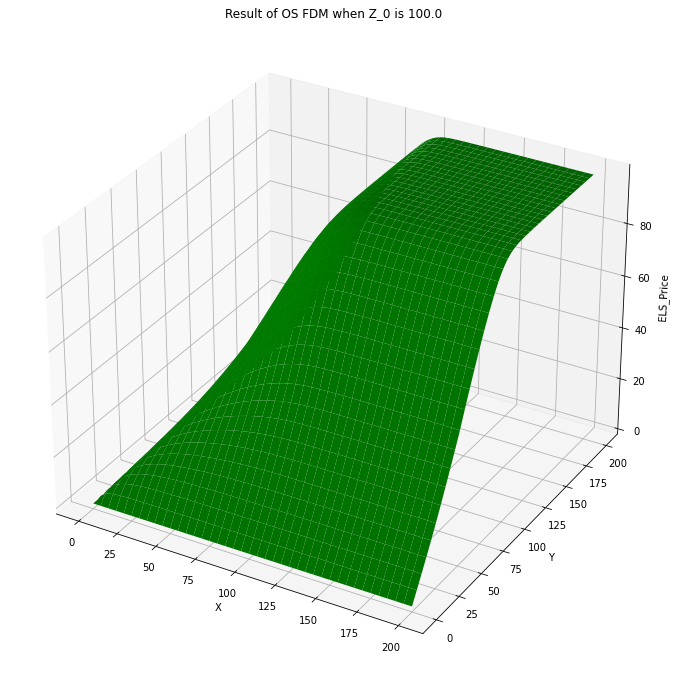

In [14]:
Plotting_ELS_Price(Pmat,max_multiple=2,X_0=100,Y_0 = 100,Z_0 = 100,color = 'green',X_name = 'X', Y_name = 'Y',target_name = 'ELS_Price')

In [15]:
def ELS_to_pickle_save(Pmat , name = 'ELS3d.pkl') : 
    temp_list = []
    for i in range(Pmat.shape[2]) :
        temp_list.append(Pmat[:,:,i])
    pd.DataFrame(np.concatenate(temp_list,axis = 0)).to_pickle(name)

def ELS_read_pickle(price_path) :    
    data = np.array(pd.read_pickle(price_path))
    Pmat = np.zeros((data.shape[-1],data.shape[-1],data.shape[-1]))
    for i in range(data.shape[-1]) :
        Pmat[:,:,i] = data[i * data.shape[-1]: (i+1) * data.shape[-1]]    
    return Pmat

 ### Local Volatility Monte Carlo Simulation
 
 $$
 \begin{array}{c}
 dS  = (r-D)Sdt + \sigma(S,t) Sd \hat{W}
 \end{array}
 $$


In [16]:
def local_vol_for_MC(local_vol , T ,autocall_date, coupon_freq_of_year) :
    S_index = np.arange(local_vol.index[0], local_vol.index[-1]+0.001).astype(int)
    T_index =  (np.linspace(0,T, len(autocall_date)+1)[1:]*12).astype(int)
    s_range = pd.DataFrame(index= S_index)
    trange = pd.DataFrame(index =T_index)
    local_var_s_range = pd.concat([s_range,local_vol**2],axis = 1).interpolate(method = 'cubic')
    local_var_t_range = pd.concat([trange,local_var_s_range.fillna(method = 'ffill').fillna(method = 'bfill').T],axis=1)
    local_vol_MC = np.sqrt(local_var_t_range.interpolate(method = 'cubic').fillna(method = 'ffill').fillna(method = 'bfill').T)[T_index]
    return local_vol_MC
@jit
def vol_index(ST,S_index) :
    return np.abs( np.round(ST,0).reshape(1,-1) - S_index.reshape(-1,1)).argmin(axis=0)

def autocall_dates_and_case(min_value, ac_date_index , K_ary, S0) :
    min_value_ac_date = min_value[ac_date_index,:][:-1]
    AC_matrix = min_value_ac_date >= np.array(K_ary[:-1]).reshape(-1,1) * S0
    AC_when = (AC_matrix.cumsum(0).cumsum(0) == 1)
    AC_case_of_total = AC_when.sum(0).reshape(1,-1)
    return AC_when, AC_case_of_total
@jit
def calculate_next_XYZ(X_before,Y_before,Z_before,
                       rho_xy, rho_yz, rho_xz, 
                       simul_number,volx,voly,volz,
                       deltat,r,Divx,Divy,Divz) :
        ###########################
        # fast simulation method  #
        # half = e left -e        #
        ###########################
        half_simul_num = int(simul_number/2+0.5)
        e_xyz1 = np.random.multivariate_normal([0,0,0],[[1,rho_xy,rho_xz],
                                                       [rho_xy,1,rho_yz],
                                                       [rho_xz,rho_yz,1]], size = half_simul_num)
        e_xyz2 = -e_xyz1
        e_xyz = np.concatenate([e_xyz1,e_xyz2],axis = 0)[:simul_number,:]
        e_x = e_xyz[:,0]
        e_y = e_xyz[:,1]   
        e_z = e_xyz[:,2]
        diffusionX = volx * X_before * np.sqrt(deltat) * e_x
        diffusionY = voly * Y_before * np.sqrt(deltat) * e_y
        diffusionZ = volz * Z_before * np.sqrt(deltat) * e_z
        driftX = (r-Divx) * X_before * deltat
        driftY = (r-Divy) * Y_before * deltat 
        driftZ = (r-Divz) * Z_before * deltat
        return X_before + driftX + diffusionX, Y_before + driftY + diffusionY  , Z_before + driftZ + diffusionZ
 
def MC_step_down_ELS(pricing_date ,
                    autocall_date ,
                    K_ary  ,
                    KI_ary ,
                    coupon_rate ,
                    x_vol ,
                    y_vol,
                    z_vol,
                    discount,
                    rho_xy ,
                    rho_yz ,
                    rho_xz ,
                    Divx ,
                    Divy ,
                    Divz ,
                    simul_number = 10000,
                    coupon_freq_of_year=2,
                    price_info = True,
                    S0 = 100,
                    X_Today = 100,
                    Y_Today = 100,
                    Z_Today = 100):
    pricing_date = pd.to_datetime(pricing_date) 
    autocall_date = pd.to_datetime(autocall_date) 
    ac_len = len(autocall_date)
    pricing_date, autocall_date = pd.to_datetime(pricing_date), pd.to_datetime(autocall_date)
    bdate_to_maturity = pd.bdate_range(pricing_date, autocall_date[-1]).append(autocall_date).unique().sort_values()    
    bdate_to_maturity = bdate_to_maturity[bdate_to_maturity>=pricing_date]
    autocall_date = autocall_date[autocall_date>=pricing_date]
    ac_date_index = list(np.vectorize(list(bdate_to_maturity).index)(autocall_date))
    left_ac = len(ac_date_index)
    KI_ary= KI_ary[-left_ac:]
    K_ary = K_ary[-left_ac:]
    #######################
    ### basic settiings ###
    #######################
    F =  100
    Frate = calculate_forward_rate(autocall_date, pricing_date, discount)
    T = np.round((autocall_date[-1] - pricing_date).days/365,1)
    C_ary = np.repeat([coupon_rate/coupon_freq_of_year],ac_len).cumsum()[-len(autocall_date):]
    deltat = T/len(bdate_to_maturity)
    
    x_localvol = local_vol_for_MC(x_vol , T ,autocall_date, coupon_freq_of_year).T
    y_localvol = local_vol_for_MC(y_vol , T ,autocall_date, coupon_freq_of_year).T
    z_localvol = local_vol_for_MC(z_vol , T ,autocall_date, coupon_freq_of_year).T
    
    S_index = np.array(x_localvol.columns)
    x_localvolarray = np.array(x_localvol) # using array for jit not DataFrame
    y_localvolarray = np.array(y_localvol) # using array for jit not DataFrame
    z_localvolarray = np.array(z_localvol) # using array for jit not DataFrame
    rf = Frate
    X = np.zeros((len(bdate_to_maturity),simul_number))
    X[0] = X_Today
    Y , Z = X + 0,X + 0
    Y[0],Z[0] = Y_Today, Z_Today
    ### finding vol index ###    
    vol_index = lambda ST, S_index : np.abs( np.round(ST,0).reshape(1,-1) - S_index.reshape(-1,1)).argmin(axis=0)

    r = rf[0]
    sig_x_array = x_localvolarray[0]
    sig_y_array = y_localvolarray[0]
    sig_z_array = z_localvolarray[0]
    coupon_payment = 0
    #################
    ## compile jit ##
    #################
    calculate_next_XYZ(np.ones(3),np.ones(3),np.ones(3),
                       0, 0, 0, 
                       3,0.3,0.3,0.3,
                       0.001,0,0,0,0)
    vol_index(X[0], S_index)    
    for i in range(1,len(bdate_to_maturity)) :
        
        X_before , Y_before, Z_before = X[i-1] , Y[i-1] , Z[i-1]
        volx = sig_x_array[vol_index(X_before,S_index)]
        voly = sig_y_array[vol_index(Y_before,S_index)]  
        volz = sig_z_array[vol_index(Z_before,S_index)]
        
        X[i],Y[i],Z[i] = calculate_next_XYZ(X_before,Y_before,Z_before,
                                            rho_xy, rho_yz, rho_xz, 
                                            simul_number,volx,voly,volz,
                                            deltat,r,Divx,Divy,Divz)
        if i in ac_date_index and i < len(bdate_to_maturity)-1:
            coupon_payment +=1
            r = rf[coupon_payment]
            sig_x_array = x_localvolarray[coupon_payment]
            sig_y_array = y_localvolarray[coupon_payment]
            sig_z_array = z_localvolarray[coupon_payment]
    min_value = np.minimum(np.minimum(X, Y),Z)
    ########################
    ### 1. Autocall Case ###
    ########################
    AC_when,AC_case = autocall_dates_and_case(min_value, ac_date_index , K_ary[-left_ac:],S0)
    DF_AC = np.array(discount.loc[autocall_date])[:-1].reshape(-1,1)
    value_AC = np.array((F * (1+C_ary[:-1].reshape(-1,1)) * pd.DataFrame(AC_when) * DF_AC).sum(0))
    ######################################
    ### 2. Not Autocall and Knock In   ###
    ######################################
    KI_ = pd.Series(index = bdate_to_maturity)
    KI_.loc[autocall_date] = np.array(KI_ary) * S0
    KI_ = np.array(KI_.fillna(method = 'bfill')).reshape(-1,1)
    KI_case = (min_value[:-1] < KI_[:-1]).max(0).reshape(1,-1)
    NKI_case = 1-KI_case
    Not_AC_case = 1-AC_case
    Not_AC_KI =Not_AC_case * KI_case
    min_value_at_maturity = min_value[-1:,:]
    DF_T = discount.loc[autocall_date].iloc[-1]
    ##############################################
    ### 2-1. Value (Not Autocall and Knock In) ###
    ##############################################
    Not_AC_KI_over_K =  Not_AC_KI * (min_value_at_maturity >= S0 * K_ary[-1])
    Not_AC_KI_under_K = (Not_AC_KI - Not_AC_KI_over_K)
    value_Not_AC_KI_over_K = Not_AC_KI_over_K * F * (1+C_ary[-1])  * DF_T
    value_Not_AC_KI_under_K = Not_AC_KI_under_K * (min_value_at_maturity / S0 * F ) * DF_T
    ###################################################
    ### 2-2. Value (Not Autocall and Not Knock In)  ###
    ###################################################
    Not_AC_NKI =Not_AC_case * NKI_case
    Not_AC_NKI_over_KI = Not_AC_NKI * (min_value_at_maturity >= S0 * KI_ary[-1])
    Not_AC_NKI_under_KI = Not_AC_NKI - Not_AC_NKI_over_KI
    value_Not_AC_NKI_over_KI = F * (1+C_ary[-1]) * Not_AC_NKI_over_KI * DF_T
    value_Not_AC_NKI_under_KI = Not_AC_NKI_under_KI * (min_value_at_maturity/S0 * F) * DF_T
    path_value_of_els = value_AC + value_Not_AC_KI_over_K + value_Not_AC_KI_under_K + value_Not_AC_NKI_over_KI + value_Not_AC_NKI_under_KI
    return path_value_of_els.mean()    

In [17]:
MC_step_down_ELS(pricing_date = '2018-06-08',
                    autocall_date = ['2018-12-04','2019-06-03','2019-12-03',
                                     '2020-06-03','2020-12-03','2021-06-03'],
                    K_ary = [0.9,   0.9,   0.9,   0.85,  0.85,  0.8  ],
                    KI_ary =[0.5,   0.5,   0.5,   0.5,   0.5,   0.5  ],
                    coupon_rate =0.075,
                    x_vol= preprocessing_vol('HSI_local_vol.xlsx') ,
                    y_vol=preprocessing_vol('SX5E_local_vol.xlsx'),
                    z_vol = preprocessing_vol('SPX_local_vol.xlsx'),
                    discount=preprocessing_discount('rf.xlsx'),
                    rho_xy = 0.316,
                    rho_yz = 0.625,
                    rho_xz = 0.592,
                    Divx = 0.03711,
                    Divy = 0.03419,
                    Divz = 0.03110,
                    simul_number = 10000,
                    coupon_freq_of_year=2,
                    price_info = True,
                    S0 = 100,
                    X_Today = 100,
                    Y_Today = 100,
                    Z_Today = 100)

94.94304984411058

In [19]:
ELS_to_pickle_save(Pmat , name = 'ELS3d.pkl')